# Compute Brunt-Vaisala Frequency indicator

In [6]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from acIndUtils import acIndUtils, acIndBruntVaisGraphicUtils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading the perimeter of the area of interest

In [7]:
areaPerimeter = pd.read_csv("areas/areaAdriatic.csv")
verticalLevels = -np.arange(0, 100, 2)
maxDepth = -100 # max depth for vertical profiles

### Reading raw Brunt-Vaisala frequency data 

In [8]:
SrawDataFileSpec = acIndUtils.acNcFileSpec(
    ncFileName="/Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala-Projection/Projection-Nemo/Brunt-Vaisala/*.nc", 
    varName="BVF", xVarName="lon", yVarName="lat", zVarName="depth", tVarName="time_counter" )
SrawDataFileSpec.printSpec()
SncClippedDataFileSpec = acIndUtils.acCloneFileSpec(SrawDataFileSpec, ncFileName="bvfClippedData.nc")
SannualMapsNcFileSpec = acIndUtils.acCloneFileSpec(SncClippedDataFileSpec, ncFileName="bvfClippedAnnualMean.nc", tVarName="year")
SwinterMapsNcFileSpec = acIndUtils.acCloneFileSpec(SannualMapsNcFileSpec, ncFileName="bvfClippedWinterMean.nc")
SsummerMapsNcFileSpec = acIndUtils.acCloneFileSpec(SannualMapsNcFileSpec, ncFileName="bvfClippedSummerMean.nc")
StrendMapNcSpec = acIndUtils.acCloneFileSpec(SannualMapsNcFileSpec, ncFileName="bvfTrendMap.nc")

  ncFileName: /Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala-Projection/Projection-Nemo/Brunt-Vaisala/*.nc
  varName: BVF
  xVarName: lon
  yVarName: lat
  zVarName: depth
  tVarName: time_counter


### Generating pre-aggregates

In [6]:
"""
clipping the input data over the area of interest (may require some time)
"""
clippedData = acIndUtils.acClipDataOnRegion(SrawDataFileSpec, areaPerimeter, SncClippedDataFileSpec.ncFileName)

AdriaClim BVF Dimension: <acIndUtils.acIndUtils.acNcFileSpec object at 0x7fd368c7dee0>
Clipped Area Dimensions:            LON        LAT
0    19.641391  39.744436
1    18.375273  39.798191
2    18.391109  39.816245
3    18.399336  39.899609
4    18.399436  39.936100
..         ...        ...
413  19.694582  39.794718
414  19.673055  39.793055
415  19.650836  39.772500
416  19.640000  39.756664
417  19.641391  39.744436

[418 rows x 2 columns]
preselecting the mininumn containing rectangle, saving to  bvfClippedData.nc


KeyboardInterrupt: 

In [9]:
"""
Generating the temporary nc file with the annual means
"""
acIndUtils.acGenerateAnnualMeanMaps(SncClippedDataFileSpec, SannualMapsNcFileSpec.ncFileName)
print("done")

done


In [17]:
"""
Generating the temporary nc file with the winter means
"""
acIndUtils.acGenerateSeasonalWinter(SncClippedDataFileSpec, SwinterMapsNcFileSpec.ncFileName)
print("done")

done


In [18]:
"""
Generating the temporary nc file with the summer means
"""
acIndUtils.acGenerateSeasonalSummer(SncClippedDataFileSpec, SsummerMapsNcFileSpec.ncFileName)
print("done")

done


In [10]:
"""
Generating the temporary nc file with the map of trend.
"""
acIndUtils.acComputeSenSlope3DMap(SannualMapsNcFileSpec, StrendMapNcSpec.ncFileName)
print("done")


done


### Visualize Brunt-Vaisala frequency profiles

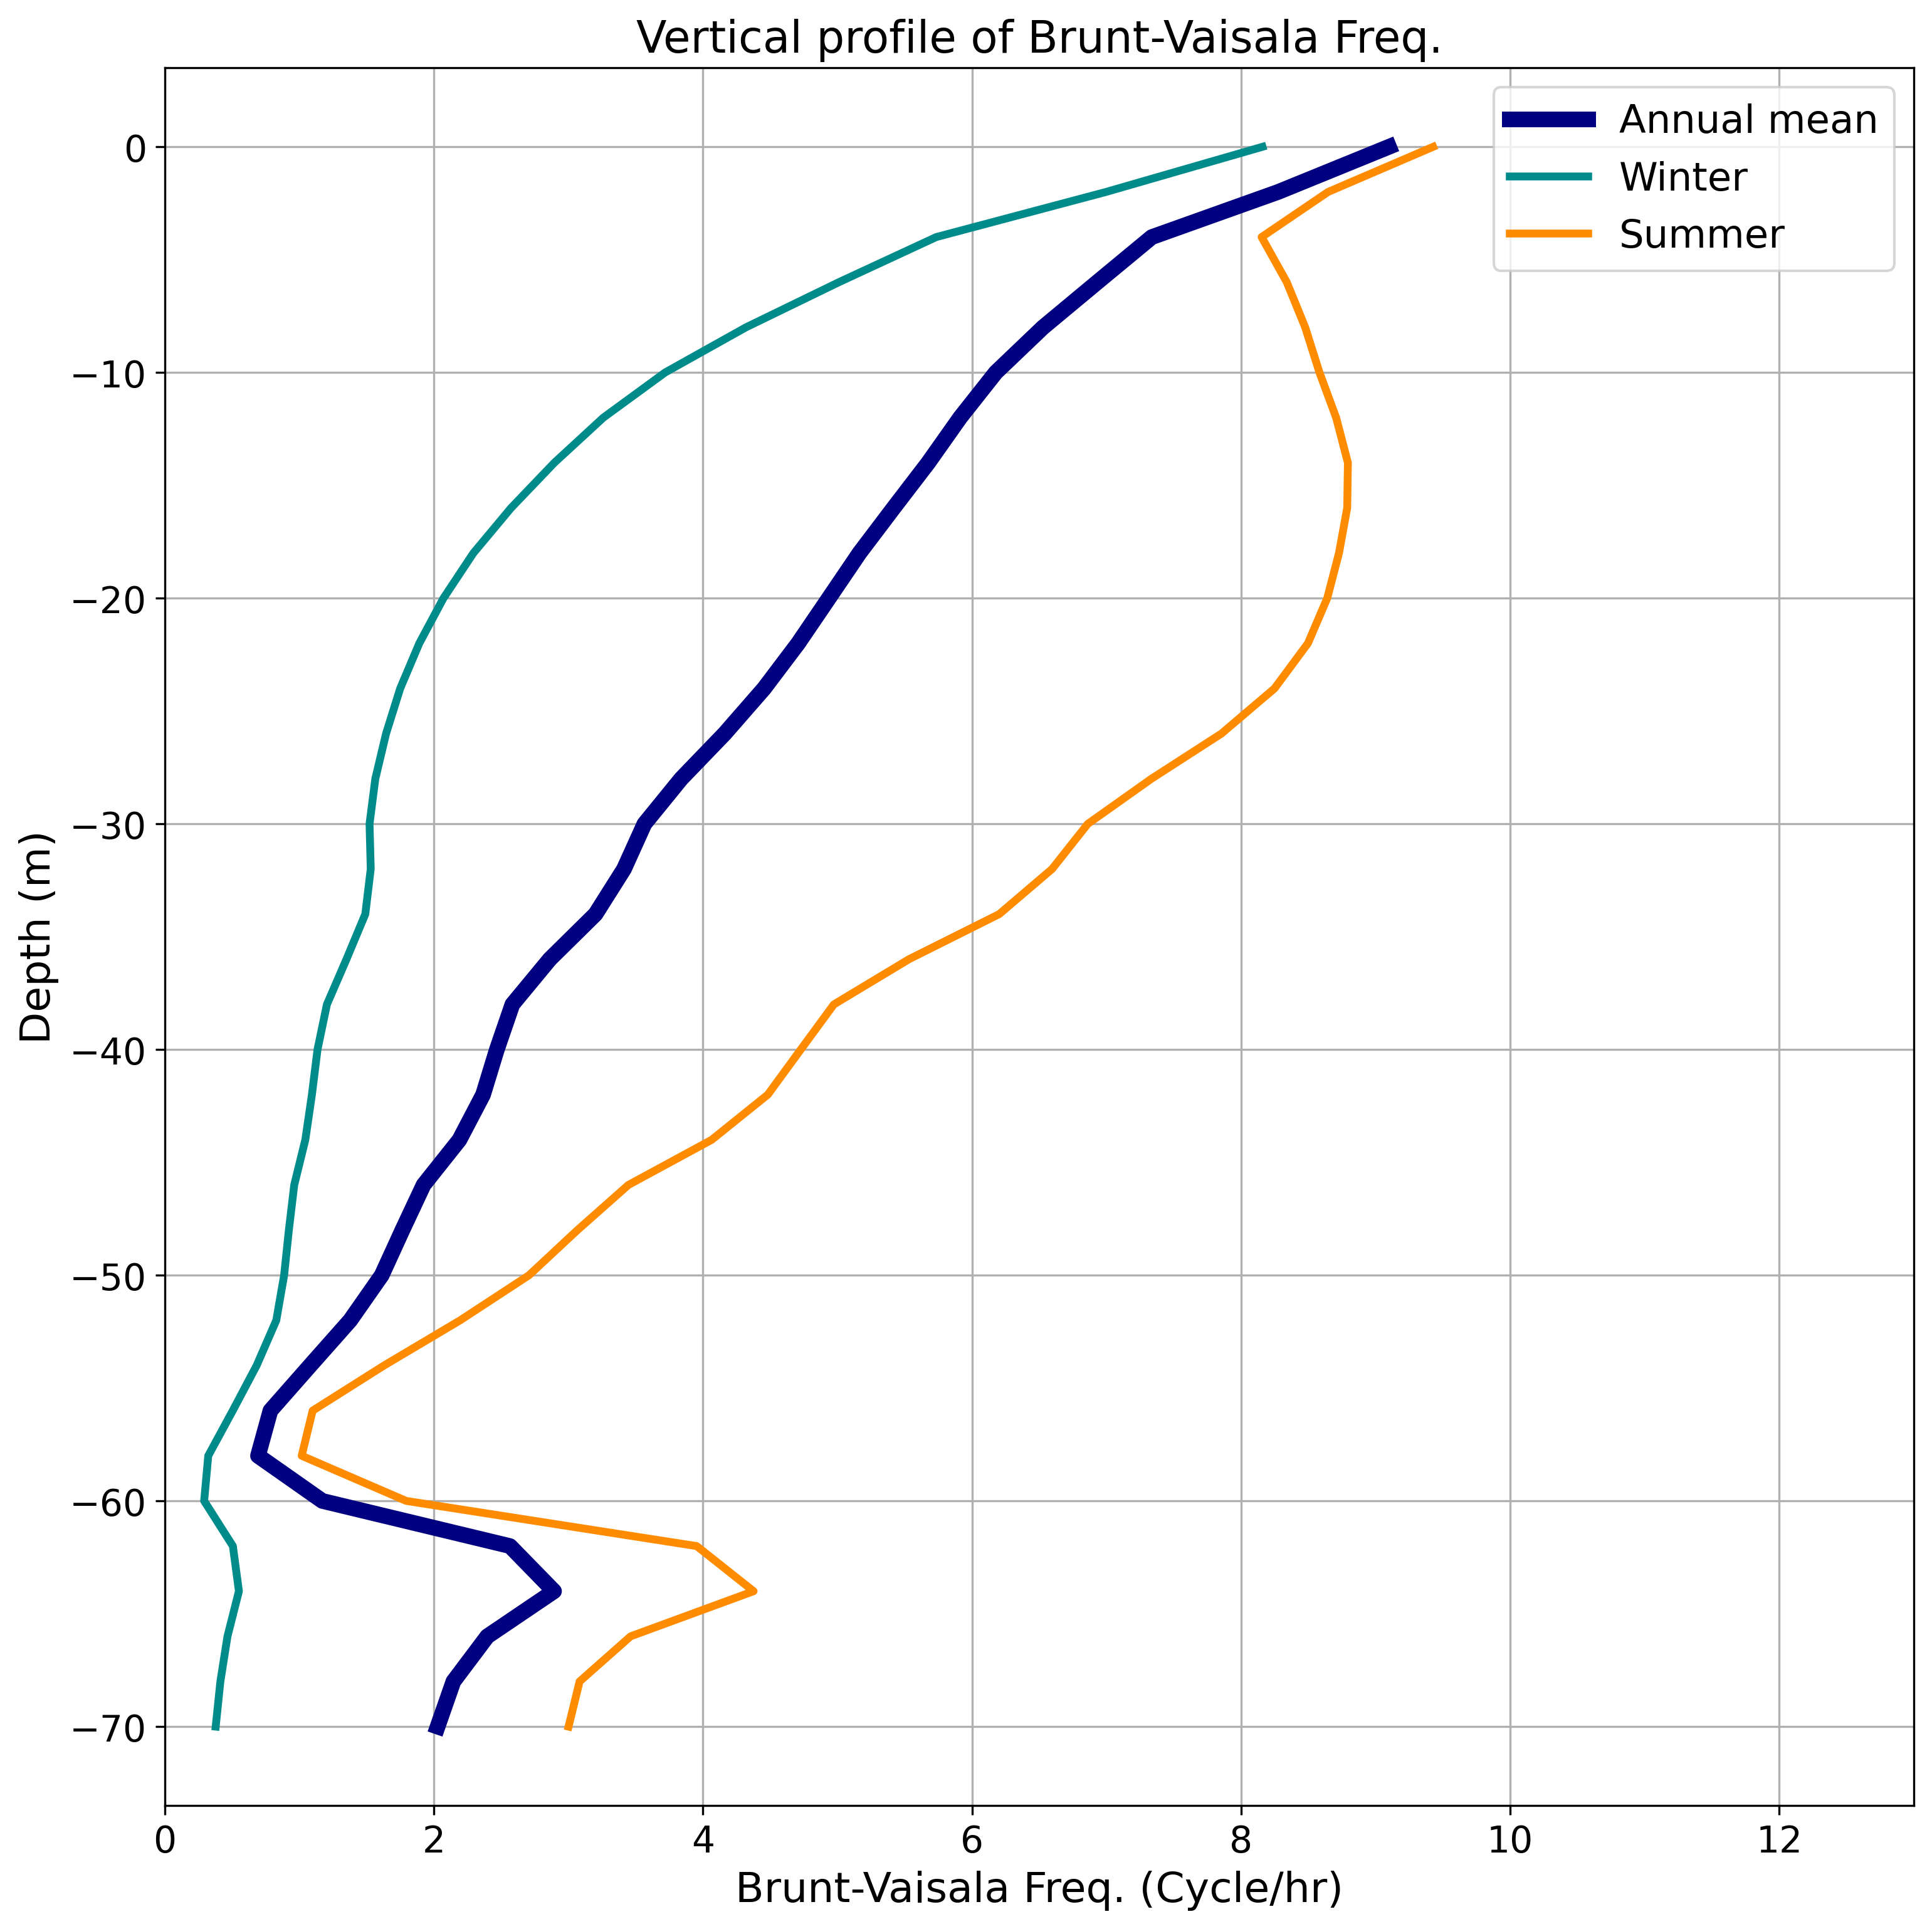

In [19]:
"""
Vertical mean profiles of salinity: annual, winter, summer
"""
outvert="/Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala-Projection/BVF_profile_proj_NAdr"

figVProf = acIndBruntVaisGraphicUtils.acBruntVaisPlotVProfileAll(SannualMapsNcFileSpec, SsummerMapsNcFileSpec, SwinterMapsNcFileSpec,\
                                                                 maxDepth, psuLims=(0,13), zlevs=verticalLevels, csv=True, pth=outvert)

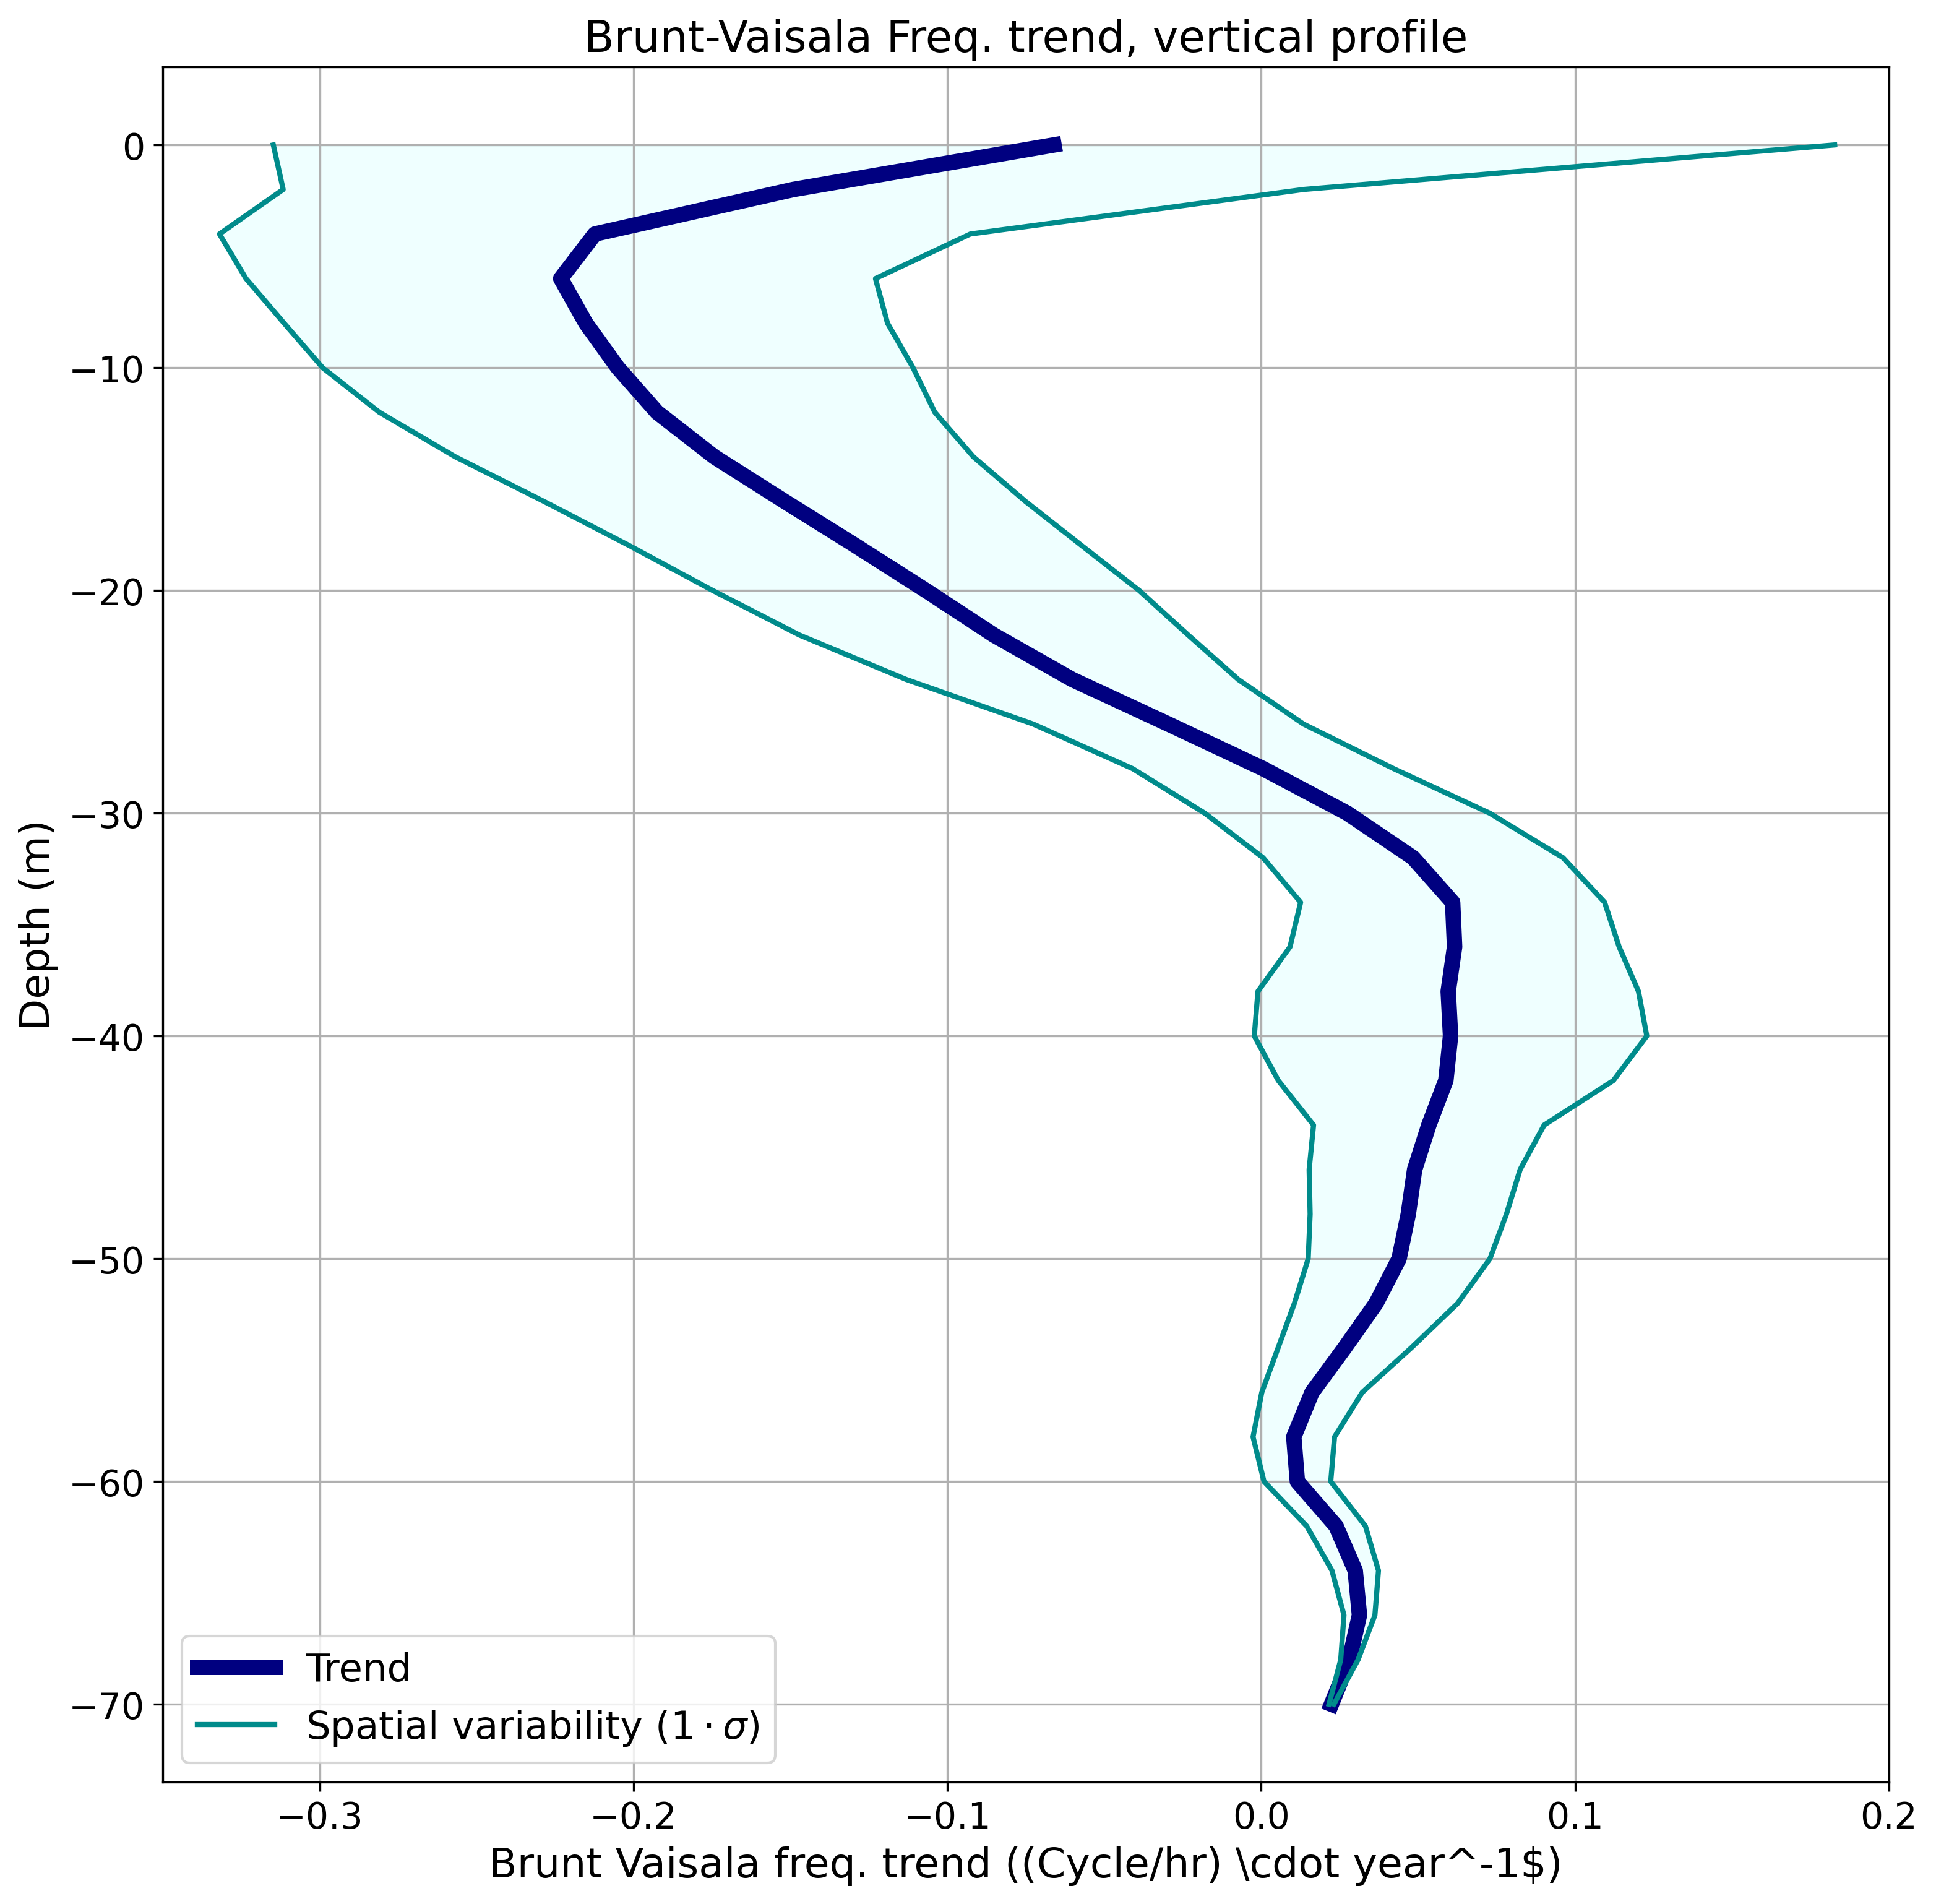

In [23]:
"""
Trend of salinity, vertical profile
"""
outvert="/Users/jalessandri/ADRIACLIM/Indicators/Brunt-Vaisala-Projection/BVF_profile_proj_NAdr"

figVProfTrend = acIndBruntVaisGraphicUtils.acBruntVaisPlotVProfileTrend(StrendMapNcSpec, maxDepth, zlevs=verticalLevels, \
                                                                        psuLims=(-0.35,0.2) , csv=True, pth=outvert) 